# Gradien Descent

[Open in Colab](https://colab.research.google.com/github/Stitch-bleu/inde-577-project/blob/main/Supervised/2_Gradient%20Descent/Gradient_Descent.ipynb)

## 1. Import data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data
data = pd.read_csv('/Users/stitchbleu/577_Project/Data/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 2. Data Preparation

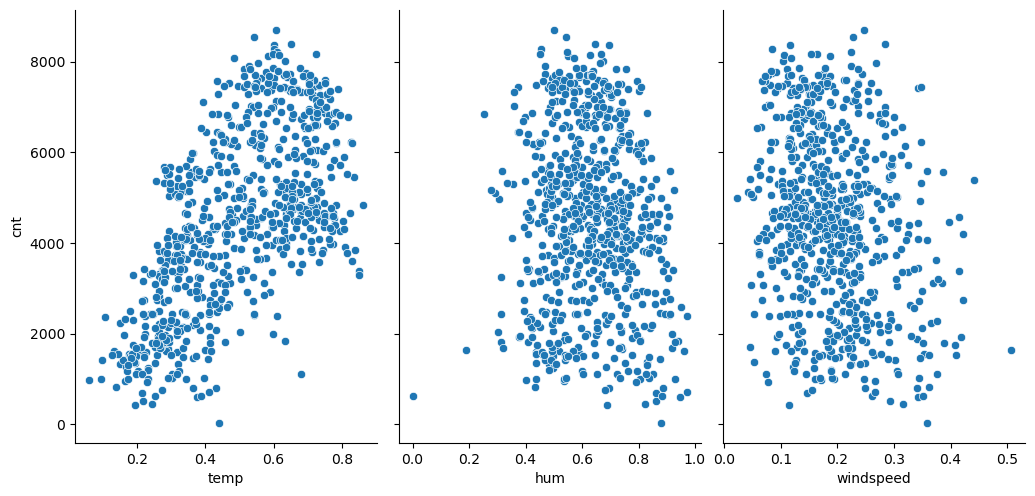

In [3]:
features = ['temp', 'hum', 'windspeed']
X = data[features].values  # Extracting feature matrix
y = data['cnt'].values     # Target variable

sns.pairplot(data, x_vars=features, y_vars='cnt', height=5, aspect=0.7, kind='scatter')
plt.show()

## 3. Gradient Descent for Linear Regression

In [5]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features) 
    bias = 0                        
    mse_history = []                

    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        mse = np.mean((y_pred - y) ** 2)
        mse_history.append(mse)
    
    return weights, bias, mse_history


## 4. Application

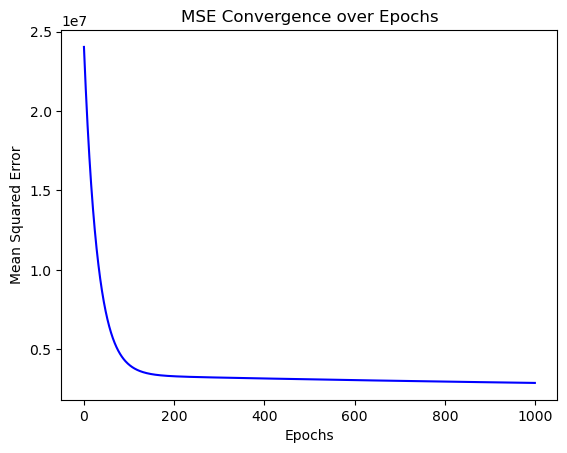

Final weights: [2754.53618882  984.84673728  184.5847188 ]
Final bias: 2500.135563637577


In [7]:
learning_rate = 0.01
epochs = 1000

weights, bias, mse_history = gradient_descent(X, y, learning_rate, epochs)

# Plot MSE
plt.plot(range(epochs), mse_history, color='blue')
plt.title('MSE Convergence over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

print("Final weights:", weights)
print("Final bias:", bias)


## 5. visualization

Mean Squared Error (MSE): 2723093.009623549
R-squared (R²): 0.273387379548401


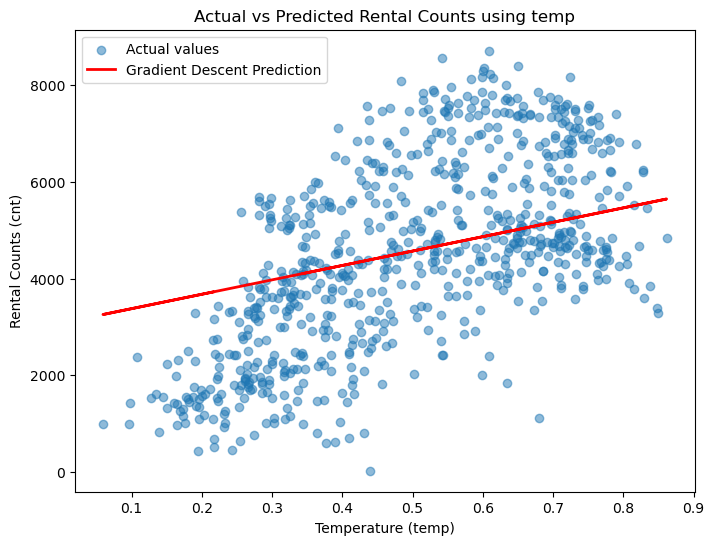

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = temp * weights_temp + bias_temp

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(temp, y, label="Actual values", alpha=0.5)
plt.plot(temp, y_pred, color='red', label="Gradient Descent Prediction", linewidth=2)
plt.xlabel("Temperature (temp)")
plt.ylabel("Rental Counts (cnt)")
plt.title("Actual vs Predicted Rental Counts using temp")
plt.legend()
plt.show()


